# Import Packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
# import seaborn as sns
import statsmodels.api as sm
from ISLP import load_data

# ISLP – Auto Dataset, Question 8

Simple linear regression of `mpg` (response) on `horsepower` (predictor).

- Part (a): Fit model and interpret output
- Part (b): Plot data and regression line
- Part (c): Diagnostic plots and comments

## Load the `Auto` data

In [6]:
Auto = load_data('Auto')
Auto.describe()
# Auto.columns
# Auto.shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Part (a): Simple linear regression of mpg on horsepower

In [9]:
y = Auto['mpg'] # response
X = Auto['horsepower'] # predictor
X = sm.add_constant(X) # add intercept

X.head()

,const,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140


### Fit the model and view summary

In [10]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        21:32:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of regression output


**1. Is there a relationship between horsepower and mpg?**

Yes.
The p-value for the horsepower coefficient is **< 0.0001**, which is extremely small.
This means **horsepower is a statistically significant predictor** of mpg.

---

**2. What is the direction of the relationship?**

The coefficient for horsepower is:

**β₁ = –0.1578**

This is **negative**, so:

* As horsepower increases, mpg **decreases**.
* Cars with more horsepower tend to have **lower fuel efficiency**.

---

**3. How strong is the relationship?**

* **R² = 0.606**
  This means about **60.6 percent** of the variation in mpg is explained by horsepower alone.

* The **F-statistic is 599.7** with a p-value of **7.03e-81**, which confirms the model is highly significant.

This is a **strong linear relationship** for a single-variable model.

---

**4. Interpret the coefficients**

* **Intercept (β₀ = 39.9359)**
  When horsepower = 0, the predicted mpg is about 39.94.
  (This is not physically meaningful, but it is the baseline of the model.)

* **Slope (β₁ = –0.1578)**
  For each 1-unit increase in horsepower, mpg **decreases by about 0.158 mpg** on average.

---

**5. Are the coefficients statistically significant?**

Both coefficients have p-values **< 0.0001**, meaning:

* The intercept is significant
* The slope (horsepower) is highly significant

Thus, horsepower is an important predictor of mpg.

---

**6. Confidence interval for the slope**

95 percent CI for horsepower:

**[–0.171, –0.145]**

Because the entire interval is **negative**, the negative relationship is **statistically guaranteed** at the 95 percent confidence level.

---

**7. Normality and diagnostic quick check**

* Jarque-Bera (JB) p-value = **0.000175**
  → Residuals are *not perfectly normal*, but this is common with large samples.

* Skew = **0.492**, Kurtosis = **3.299**
  → Slight right skew but not severe.

* Durbin-Watson = **0.920**
  → Slight positive autocorrelation in residuals (not a huge problem here).

Diagnostics slightly warn that the model is not perfect, but **the main conclusion still holds**.

---

**8. Overall conclusion**

There is a **strong, negative, statistically significant** linear relationship between horsepower and mpg.
Horsepower alone explains roughly **61 percent** of the variation in fuel efficiency, and the model confirms that:

> **Cars with higher horsepower tend to consume more fuel and achieve lower mpg.**


## Part (b): Plot mpg vs horsepower with fitted regression line

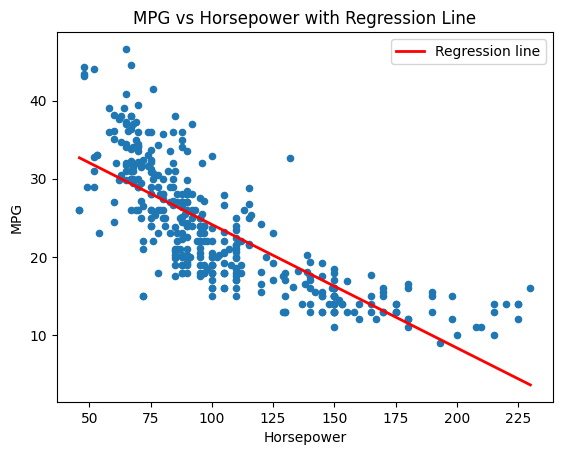

In [17]:
ax = Auto.plot.scatter(x="horsepower", y="mpg")

# Add regression line using the fitted model
horsepower_range = np.linspace(Auto['horsepower'].min(), Auto['horsepower'].max(), 100)
X_pred = sm.add_constant(horsepower_range)
y_pred = model.predict(X_pred)

ax.plot(horsepower_range, y_pred, color='red', linewidth=2, label='Regression line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs Horsepower with Regression Line')
ax.legend();

## Part (c): Regression diagnostics

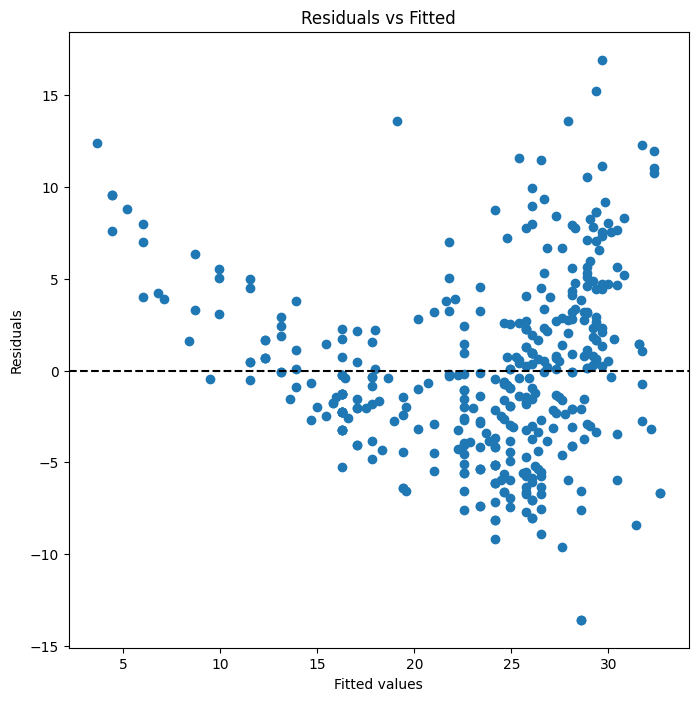

In [24]:
fitted = model.fittedvalues
residuals = model.resid

ax = subplots(figsize=(8,8))[1]
ax.scatter(fitted, residuals)
ax.axhline(0, c='k', linestyle="--")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted");


Text(0, 0.5, 'Leverage')

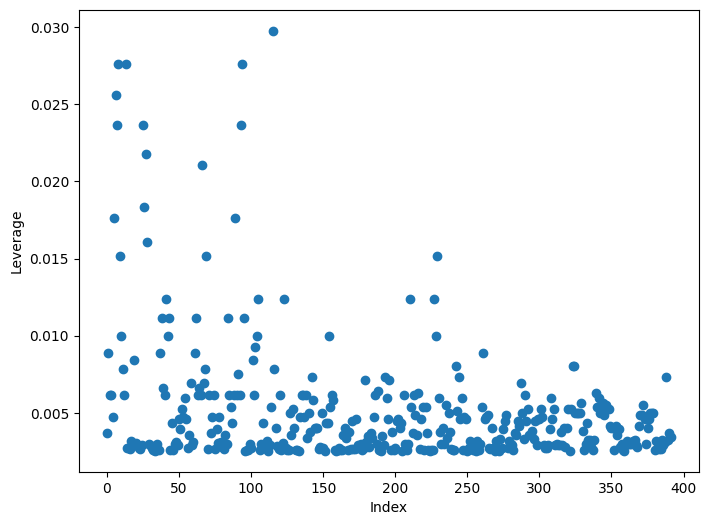

In [27]:
infl = model.get_influence()
ax = subplots(figsize=(8,6))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")

